In [5]:
import sys
sys.path.append('../')
import nexullance.LP_gurobi as LP
import topologies.Slimfly as Slimfly
import globals as gl
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [6]:
config=(32, 6)
EPR=3
topo='slimfly'
_network=Slimfly.Slimflytopo(config[0], config[1])
edge_list=list(_network.nx_graph.edges())


# Uniform traffic

In [7]:
p2p_traffic_matrix=gl.generate_uniform_traffic_pattern(config[0], EPR)
R2R_matrix=gl.convert_p2p_traffic_matrix_to_R2R(p2p_traffic_matrix, config[0], EPR)

nexullance-APST-4

In [8]:
results, _, path_dict = gl.calculate_data_shortest_paths(_network, config)
link_loads, local_link_load=_network.distribute_arbitrary_flow_on_paths_with_EPs(path_dict, EPR, p2p_traffic_matrix)
print(f'predicted saturation load (before optimization) = {local_link_load/max(link_loads)}')
all_weighted_paths=gl.convert_path_dict_to_weighted_path_dict(path_dict)

calculation done for (32, 6) with shortest paths routing
predicted saturation load (before optimization) = 1.0555555555555556


check the selected path lengths

In [9]:
nexullance_path_length_stat={}
for s_d, weighted_paths in all_weighted_paths.items():
    if R2R_matrix[s_d[0]][s_d[1]]==0:
        continue
    # input_path_len_stat=[]
    paths_stat=[]
    for path, weight in weighted_paths:
        path_length=len(path)-1
        if round(weight, 3)>0:
            paths_stat.append([path_length, weight])
    nexullance_path_length_stat[s_d]=paths_stat

Text(0, 0.5, 'frequency')

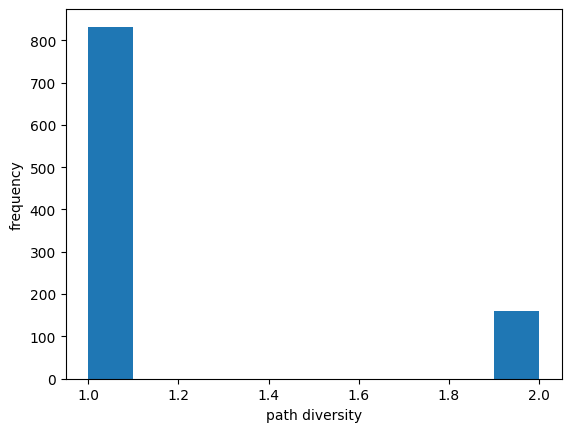

In [10]:
# path diversity
data=[]
for paths_stat in nexullance_path_length_stat.values():
    data.append(len(paths_stat))
plt.hist(data)
plt.xlabel("path diversity")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

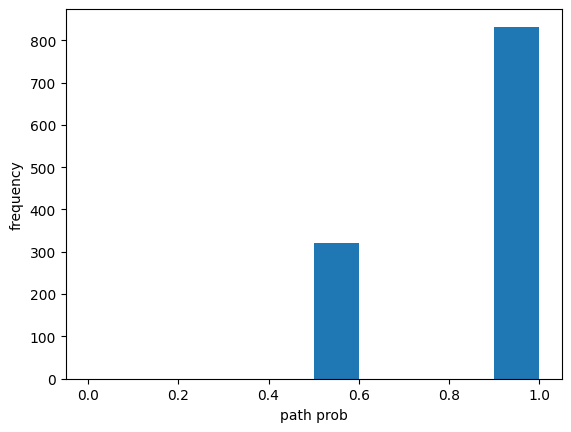

In [11]:
# path prob
data=[]
for paths_stat in nexullance_path_length_stat.values():
    for path_stat in paths_stat:
        data.append(round(path_stat[1], 3))
plt.hist(data, range=(0,1))
plt.xlabel("path prob")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

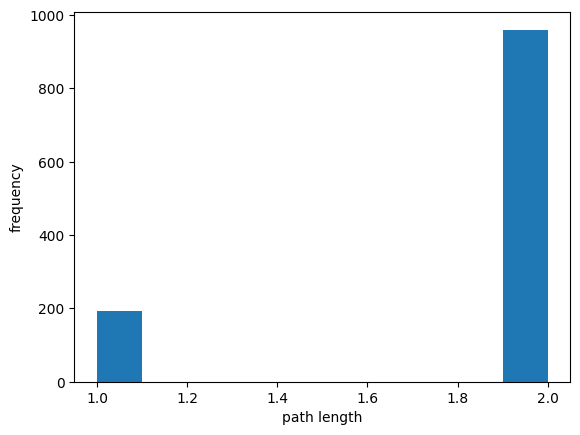

In [12]:
# path length
data=[]
for paths_stat in nexullance_path_length_stat.values():
    for path_stat in paths_stat:
        data.append(path_stat[0])
plt.hist(data)
plt.xlabel("path length")
plt.ylabel("frequency")

Text(0, 0.5, 'path prob')

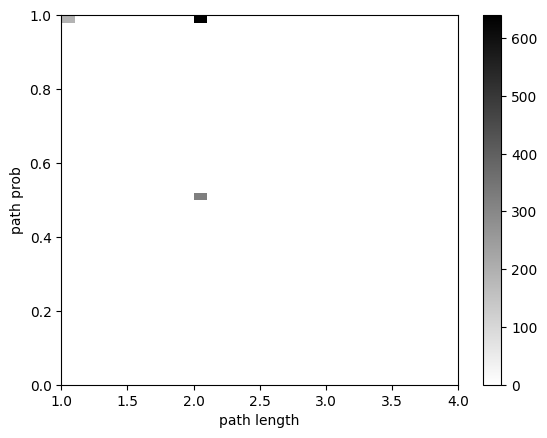

In [13]:
# 2-d: path length and path prob
path_length_data=[]
path_prob_data=[]
for paths_stat in nexullance_path_length_stat.values():
    for path_stat in paths_stat:
        path_length_data.append(path_stat[0])
        path_prob_data.append(round(path_stat[1], 3))
plt.hist2d(path_length_data, path_prob_data,cmap ="binary", range=(((1,4), (0,1))), bins=[30,50])
plt.colorbar()
plt.xlabel("path length")
plt.ylabel("path prob")

Text(0.5, 1.0, 'only s-d with distance=1')

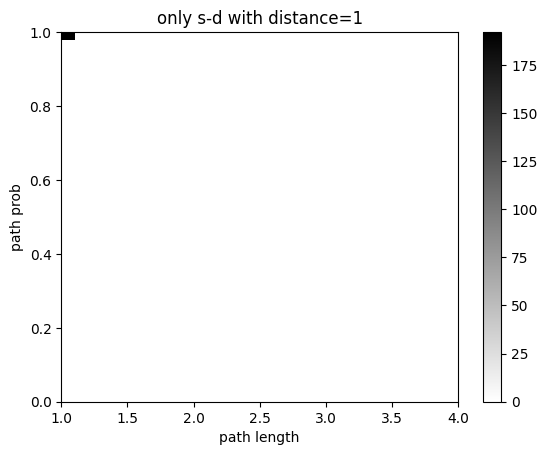

In [14]:
# 2-d: path length and path prob, for those s-d with distance=1
path_length_data=[]
path_prob_data=[]
for (s, d), paths_stat in nexullance_path_length_stat.items():
    if nx.shortest_path_length(_network.nx_graph, s, d)==1:
        for path_stat in paths_stat:
            path_length_data.append(path_stat[0])
            path_prob_data.append(round(path_stat[1], 3))
plt.hist2d(path_length_data, path_prob_data,cmap ="binary", range=(((1,4), (0,1))), bins=[30,50])
plt.colorbar()
plt.clim(0)
plt.xlabel("path length")
plt.ylabel("path prob")
plt.title("only s-d with distance=1")


Text(0.5, 1.0, 'only s-d with distance=2')

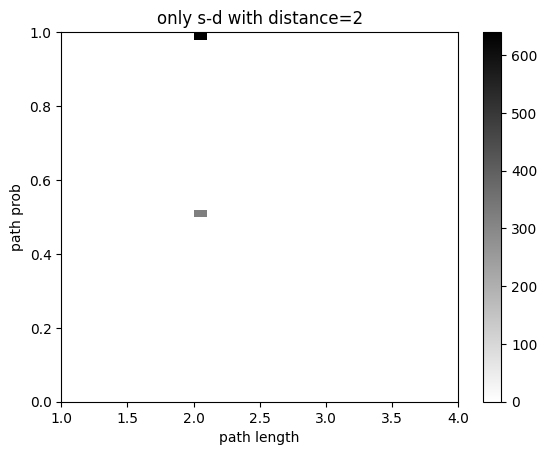

In [15]:
# 2-d: path length and path prob, for those s-d with distance=2
path_length_data=[]
path_prob_data=[]
for (s, d), paths_stat in nexullance_path_length_stat.items():
    if nx.shortest_path_length(_network.nx_graph, s, d)==2:
        for path_stat in paths_stat:
            path_length_data.append(path_stat[0])
            path_prob_data.append(round(path_stat[1], 3))
plt.hist2d(path_length_data, path_prob_data,cmap ="binary", range=(((1,4), (0,1))), bins=[30,50])
plt.colorbar()
plt.clim(0)
plt.xlabel("path length")
plt.ylabel("path prob")
plt.title("only s-d with distance=2")
